Autor: Tesfay Tesfay

### Installations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



Importing the CSV file

In [3]:
df = pd.read_csv("MP2_Data.csv")
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [4]:
df.shape

(107, 48)

Is there any missing value?
**No**

In [5]:
# Check if there is any missing value
df.isna().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [6]:
df['Grade'].value_counts()

0    48
4    24
3    17
5    13
2     5
Name: Grade, dtype: int64

Checking the grade distribution

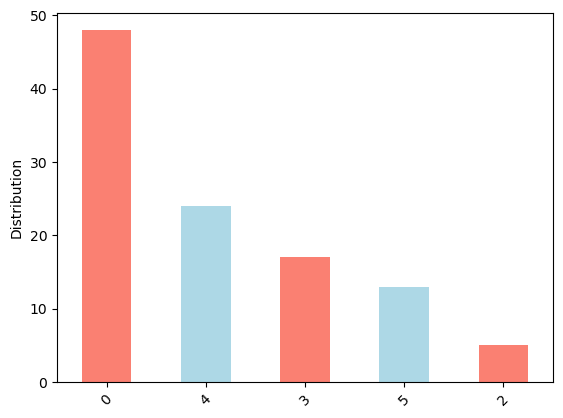

In [7]:
df["Grade"].value_counts().plot(ylabel="Distribution", kind="bar", color =["salmon", "lightblue"]);
plt.xticks(rotation=45)
plt.show()

Information about features

In [8]:
# Get more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [9]:
# Dropping the "ID" column since it does not contribute to the prdiction models
df = df.drop("ID", axis = 1)

Correlation between features

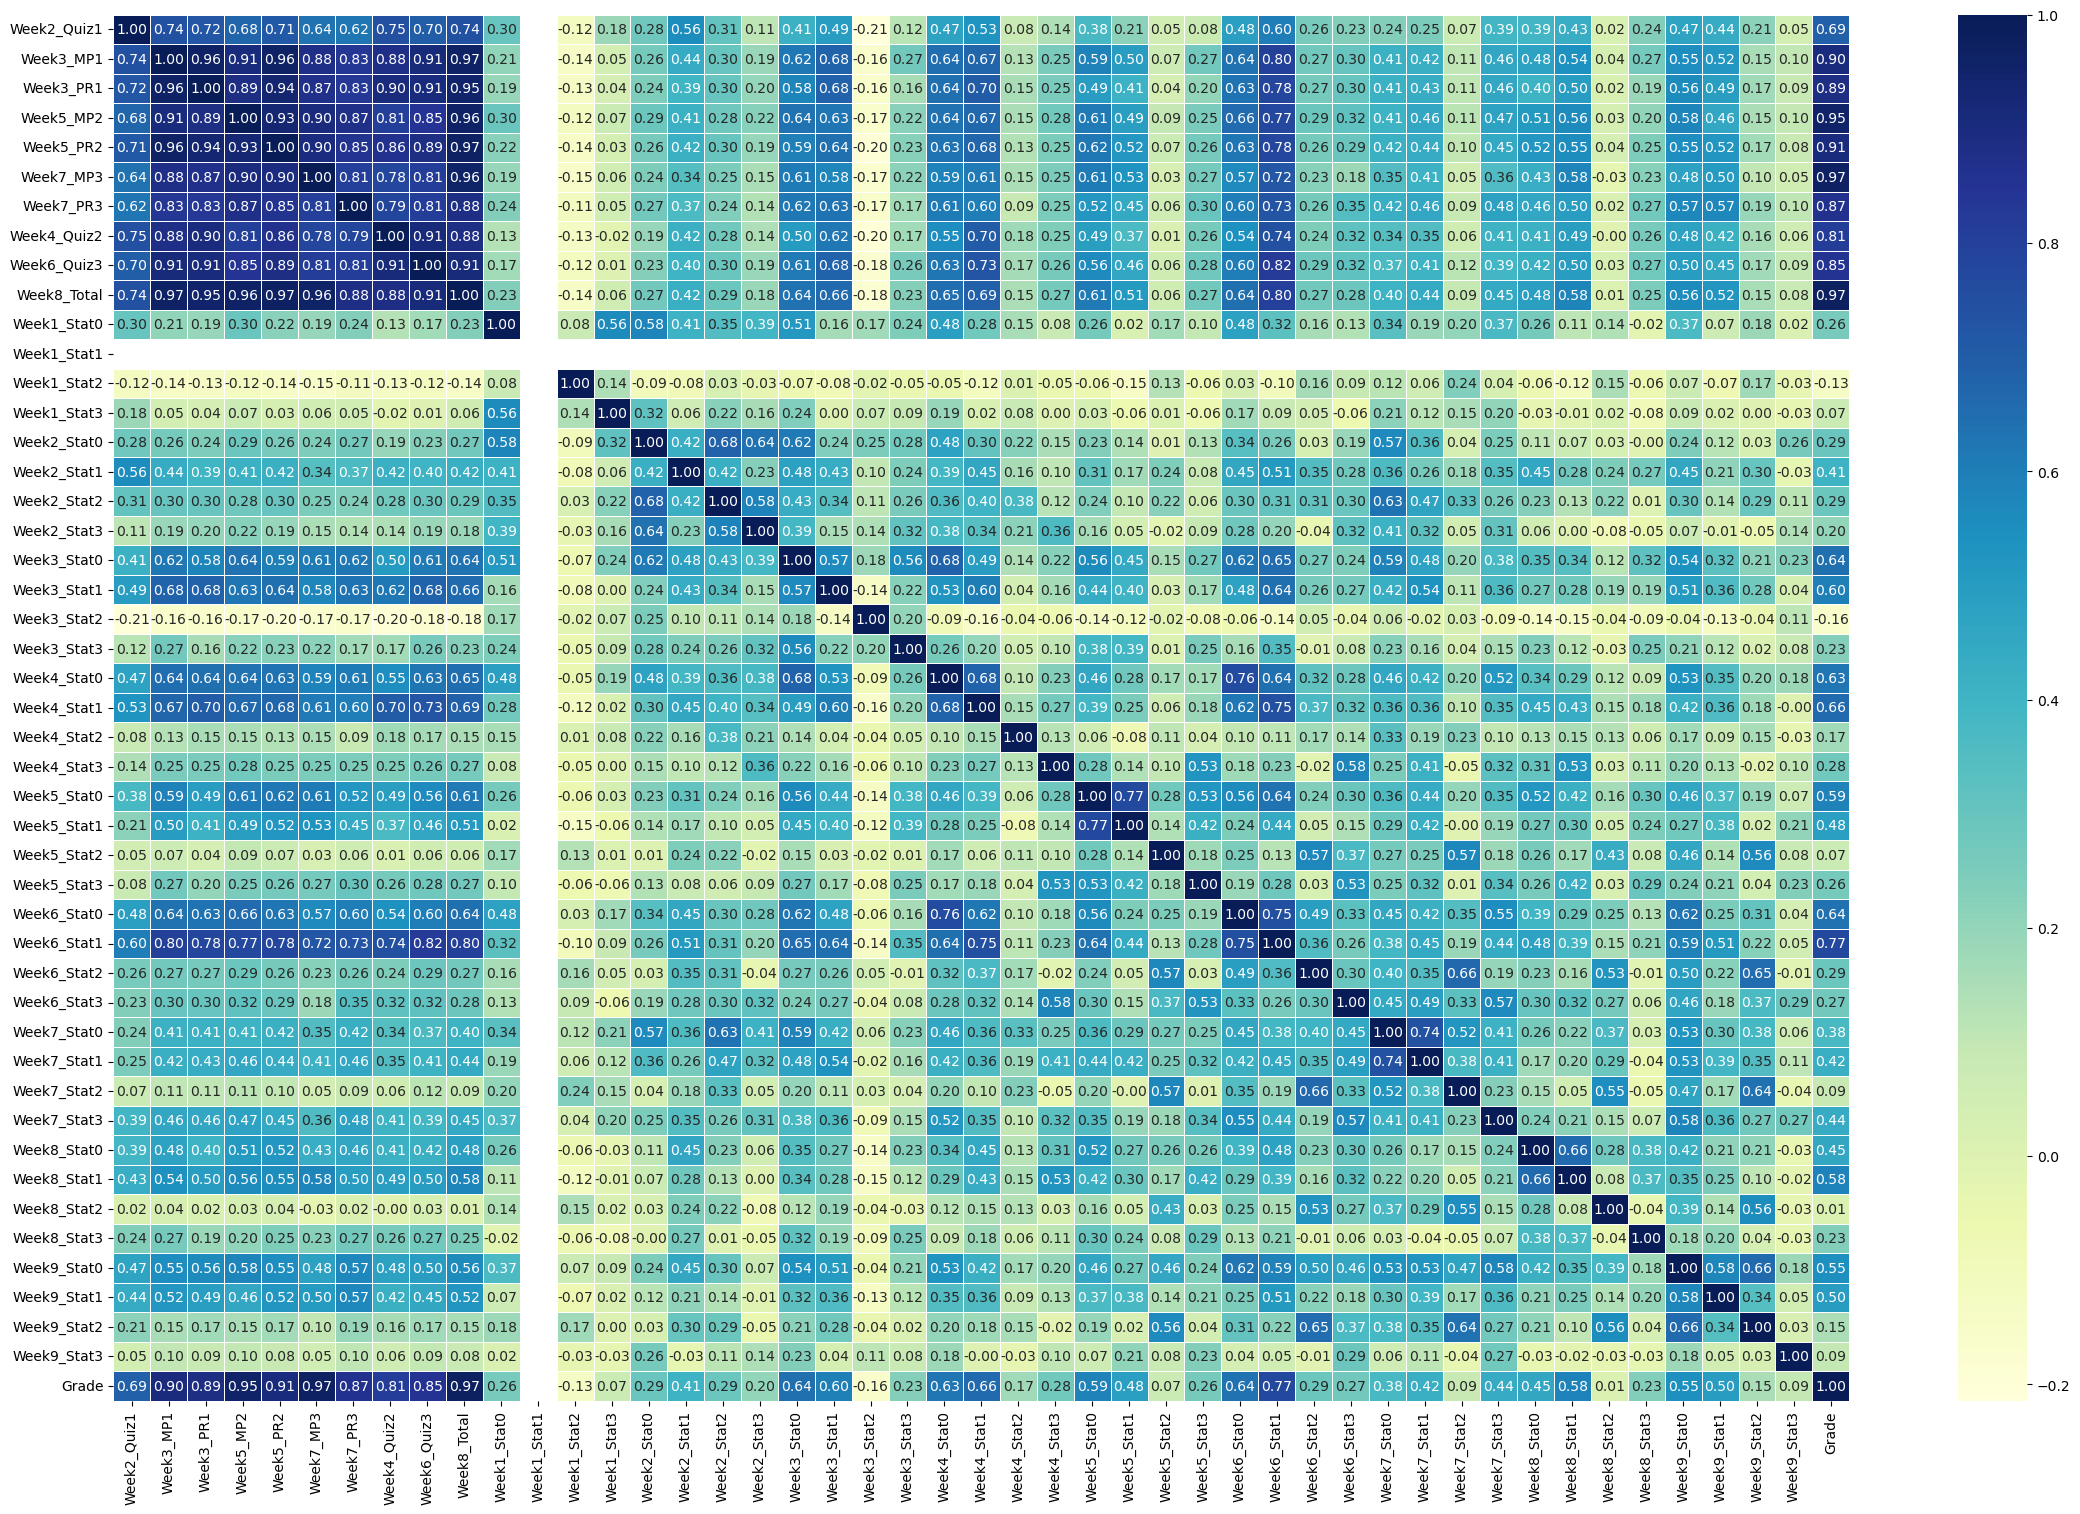

In [10]:
# Correlation matrix using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(28, 18))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [11]:
# Dropping the "Week1_Stat1" column since it does not contribute to the prdiction models
df = df.drop("Week1_Stat1", axis = 1)

Splitting data into train and test dataset

In [12]:
# Split data into X and y
X = df.drop("Grade", axis=1)
y = df["Grade"]

# Set a random seed
np.random.seed(42)

# Split data into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
len(y_train), len(y_test)

(85, 22)

Defining the models and metrics

In [14]:
# Placing the two models in a dictionary
models = {"Random Forest Classifier": RandomForestClassifier(),
          "GB Classifier": GradientBoostingClassifier(random_state=0)}

# Creating a function to fit and score the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores given machine learning models.
    models: a dict of the two scikit learn machine learning models
    X_train: training data (no labels)
    X_test: test data(no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set a random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        # Evaluate the model and append it to the model_scores

        accuracy = accuracy_score(y_test, y_preds)
        model_scores[name + " accuracy"] = accuracy

        # Precision, Recall, F1-score (macro and micro averaging)
        macro_precision = precision_score(y_test, y_preds, average='macro', zero_division=1)
        micro_precision = precision_score(y_test, y_preds, average='micro')
        model_scores[name + " macro_precision"] = macro_precision
        model_scores[name + " micro_precision"] = micro_precision

        macro_recall = recall_score(y_test, y_preds, average='macro')
        micro_recall = recall_score(y_test, y_preds, average='micro')
        model_scores[name + " macro_recall"] = macro_recall
        model_scores[name + " micro_recall"] = micro_recall

        macro_f1 = f1_score(y_test, y_preds, average='macro')
        micro_f1 = f1_score(y_test, y_preds, average='micro')
        model_scores[name + " macro_f1"] = macro_f1
        model_scores[name + " micro_f1"] = micro_f1
    return model_scores

In [15]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Random Forest Classifier accuracy': 0.9090909090909091,
 'Random Forest Classifier macro_precision': 0.9,
 'Random Forest Classifier micro_precision': 0.9090909090909091,
 'Random Forest Classifier macro_recall': 0.7333333333333333,
 'Random Forest Classifier micro_recall': 0.9090909090909091,
 'Random Forest Classifier macro_f1': 0.6933333333333334,
 'Random Forest Classifier micro_f1': 0.9090909090909091,
 'GB Classifier accuracy': 0.9090909090909091,
 'GB Classifier macro_precision': 0.7818181818181819,
 'GB Classifier micro_precision': 0.9090909090909091,
 'GB Classifier macro_recall': 0.7333333333333333,
 'GB Classifier micro_recall': 0.9090909090909091,
 'GB Classifier macro_f1': 0.7504761904761905,
 'GB Classifier micro_f1': 0.9090909090909091}

Feature importance at this first stage for Gradient Boosting Classifier - best performer

In [16]:
feature_names = X_train.columns.tolist()
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

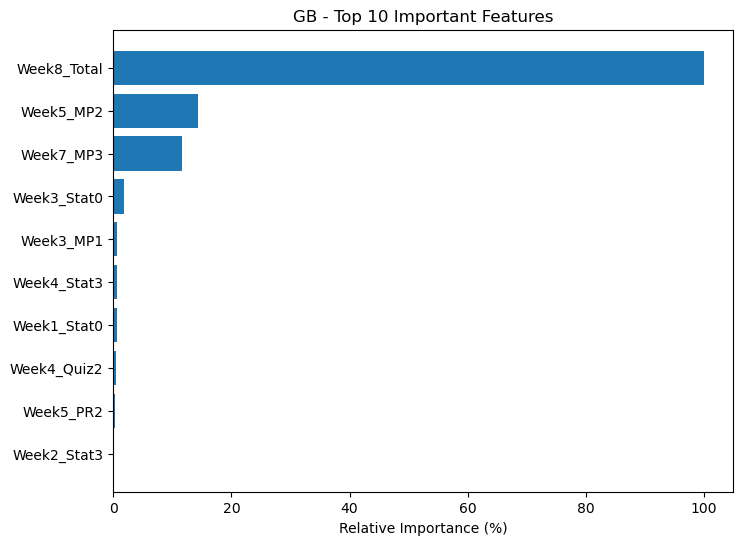

In [17]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Get sorted indices of feature importances
sorted_idx = np.argsort(feature_importance)

# Select the top 10 features
top_sorted_idx = sorted_idx[-10:]

pos = np.arange(top_sorted_idx.shape[0]) + .5
plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[top_sorted_idx])
plt.yticks(pos, np.array(X_train.columns)[top_sorted_idx])
plt.xlabel('Relative Importance (%)')
plt.title('GB - Top 10 Important Features')
plt.show()



Feature importance at this first stage for Random Forest Classifier - second best performer

In [18]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


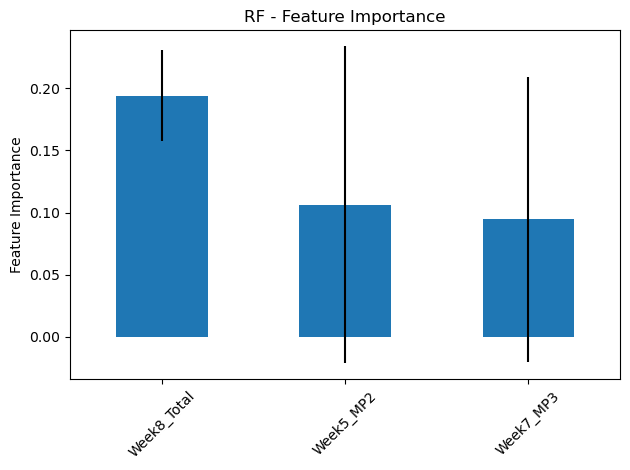

In [20]:
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top_3_importances = forest_importances[:3]
fig, ax = plt.subplots()
top_3_importances.plot.bar(yerr=std[:3], ax=ax)
ax.set_title("RF - Feature Importance")
ax.set_ylabel("Feature Importance")
plt.xticks(rotation=45)
fig.tight_layout()

Filtering data baseed on correlation thresholds and scaling

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Calculate the correlation matrix between all features
correlation_matrix = df.corr()

# Extract correlations with 'Grade' (including 'Grade' itself)
correlation_with_grade = correlation_matrix['Grade']

# Filter features based on correlation thresholds (between 0.5 and 0.95 in absolute value)
filtered_columns = correlation_with_grade.index[
    (correlation_with_grade.abs() > 0.5) & (correlation_with_grade.abs() < 0.95)
]

# Ensure 'Grade' is included in the filtered data since the correlation will be 1
if 'Grade' not in filtered_columns:
    filtered_columns = np.append(filtered_columns, 'Grade')

# Select only those filtered columns
filtered_data = df[filtered_columns]

# Apply scaling to the remaining features (excluding 'Grade')
scaler = StandardScaler()
scaled_filtered_data = scaler.fit_transform(filtered_data.drop(columns='Grade'))

# Display the filtered columns and the shape of the scaled data
print(filtered_columns)
print(scaled_filtered_data.shape)



['Week2_Quiz1' 'Week3_MP1' 'Week3_PR1' 'Week5_PR2' 'Week7_PR3'
 'Week4_Quiz2' 'Week6_Quiz3' 'Week3_Stat0' 'Week3_Stat1' 'Week4_Stat0'
 'Week4_Stat1' 'Week5_Stat0' 'Week6_Stat0' 'Week6_Stat1' 'Week8_Stat1'
 'Week9_Stat0' 'Grade']
(107, 16)


Splitting the new data into train and test dataset

In [22]:
# Split data into X and y
X = filtered_data.drop("Grade", axis=1)
y = filtered_data["Grade"]

# Set a random seed
np.random.seed(42)

# Split data into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Random Forest Classifier accuracy': 0.6363636363636364,
 'Random Forest Classifier macro_precision': 0.39,
 'Random Forest Classifier micro_precision': 0.6363636363636364,
 'Random Forest Classifier macro_recall': 0.4,
 'Random Forest Classifier micro_recall': 0.6363636363636364,
 'Random Forest Classifier macro_f1': 0.3771428571428571,
 'Random Forest Classifier micro_f1': 0.6363636363636364,
 'GB Classifier accuracy': 0.5,
 'GB Classifier macro_precision': 0.6133333333333333,
 'GB Classifier micro_precision': 0.5,
 'GB Classifier macro_recall': 0.31333333333333335,
 'GB Classifier micro_recall': 0.5,
 'GB Classifier macro_f1': 0.2871428571428571,
 'GB Classifier micro_f1': 0.5}

Cross validation for Random Forest Classifier - best performer in this phase

In [24]:
# Set a random seed
np.random.seed(42)

model = RandomForestClassifier()
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5, scoring=None))

model_cross_val_score



0.6545454545454545

Feature importance for Random Forest Classifier - best performer in this phase

In [25]:
feature_names = X_train.columns.tolist()
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

y_preds = forest.predict(X_test)


In [26]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


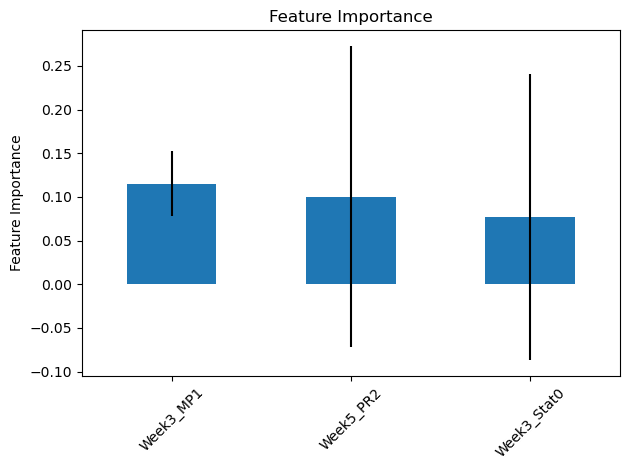

In [27]:
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top_3_importances = forest_importances[:3]
fig, ax = plt.subplots()
top_3_importances.plot.bar(yerr=std[:3], ax=ax)
ax.set_title("Feature Importance")
ax.set_ylabel("Feature Importance")
plt.xticks(rotation=45)
fig.tight_layout()